In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

### Merge Datasets from 2007 to 2020¶
Since the structure of the datasets from 2007 to 2020 is the same, I can merge them first.

In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd

# Define the directory and file names
directory = '/content/drive/My Drive/'
file_names_2007_2020 = [f'CDOTRM_CD_Crash_Listing_-_20{str(year).zfill(2)}.xlsx' for year in range(7, 21)]
# Initialize the list to store DataFrames
dataframes_2007_2020 = []

# Read each file and append to the list
for file_name in file_names_2007_2020:
    file_path = os.path.join(directory, file_name)
    df = pd.read_excel(file_path)
    print(f"Loaded {file_name} with {df.shape[0]} rows")
    dataframes_2007_2020.append(df)

Loaded CDOTRM_CD_Crash_Listing_-_2007.xlsx with 112191 rows
Loaded CDOTRM_CD_Crash_Listing_-_2008.xlsx with 104966 rows
Loaded CDOTRM_CD_Crash_Listing_-_2009.xlsx with 101813 rows
Loaded CDOTRM_CD_Crash_Listing_-_2010.xlsx with 99265 rows
Loaded CDOTRM_CD_Crash_Listing_-_2011.xlsx with 101236 rows
Loaded CDOTRM_CD_Crash_Listing_-_2012.xlsx with 100984 rows
Loaded CDOTRM_CD_Crash_Listing_-_2013.xlsx with 107674 rows
Loaded CDOTRM_CD_Crash_Listing_-_2014.xlsx with 115556 rows
Loaded CDOTRM_CD_Crash_Listing_-_2015.xlsx with 120926 rows
Loaded CDOTRM_CD_Crash_Listing_-_2016.xlsx with 121063 rows
Loaded CDOTRM_CD_Crash_Listing_-_2017.xlsx with 119251 rows
Loaded CDOTRM_CD_Crash_Listing_-_2018.xlsx with 122597 rows
Loaded CDOTRM_CD_Crash_Listing_-_2019.xlsx with 121805 rows
Loaded CDOTRM_CD_Crash_Listing_-_2020.xlsx with 86304 rows


In [ ]:
# Merge all the dataframes from 2007 to 2020
df_2007_2020 = pd.concat(dataframes_2007_2020, ignore_index=True)


### Merge Datasets from 2021 to 2022
Next, merge the datasets for the years 2021 to 2022, which have a different structure.

In [ ]:
# Define the file names for the years 2021 to 2022
file_names_2021_2022 = [f'CDOTRM_CD_Crash_Listing_-_20{year}.xlsx' for year in range(21, 23)]

# Initialize an empty list to store DataFrames for 2021 to 2022
dataframes_2021_2022 = []

# Read each file and append to the list
for file_name in file_names_2021_2022:
    file_path = os.path.join(directory, file_name)
    df = pd.read_excel(file_path)
    print(f"Loaded {file_name} with {df.shape[0]} rows")
    dataframes_2021_2022.append(df)



Loaded CDOTRM_CD_Crash_Listing_-_2021.xlsx with 86041 rows
Loaded CDOTRM_CD_Crash_Listing_-_2022.xlsx with 121063 rows


In [ ]:
# Merge all the dataframes from 2021 to 2022
df_2021_2022 = pd.concat(dataframes_2021_2022, ignore_index=True)


In [ ]:
from collections import Counter
global unique_to_2007_2020, unique_to_2021_2022

###  Identify common and unique column

In [ ]:
columns_2007_2020 = df_2007_2020.columns.tolist()
columns_2021_2022 = df_2021_2022.columns.tolist()
unique_to_2007_2020 = set(columns_2007_2020).difference(columns_2021_2022)
unique_to_2021_2022 = set(columns_2021_2022).difference(columns_2007_2020)

common_columns = set(unique_to_2007_2020) & set(unique_to_2021_2022)


In [ ]:
print(f"Common columns: {common_columns}")
print(f"Unique to 2007-2020: {unique_to_2007_2020}")
print(f"Unique to 2021-2022: {unique_to_2021_2022}")

Common columns: set()
Unique to 2007-2020: {'LONGITUDE', 'ROAD_DESC', 'CONDITION', 'TIME', 'LIGHTING', 'SYSTEM', 'LATITUDE', 'LOCATION', 'VEHICLES', 'AGE_1', 'WEATHER', 'SEX_1', 'RTE', 'DATE'}
Unique to 2021-2022: {'System Code', 'Road Condition', 'Longitude', 'Crash Time', 'Crash Date', 'Road Description', 'Total Vehicles', 'Latitude', 'Location 1', 'TU-1 Sex', 'Lighting Conditions', 'TU-1 Age', 'Rd_Number', 'Weather Condition'}


Renaming the merged 2021-2022 dataset so that it can match the merged 2007-2020 dataset

In [ ]:
renaming_map = {
    'System Code': 'SYSTEM',
    'Crash Date': 'DATE',
    'Crash Time': 'TIME',
    'Rd_Number': 'RTE',
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Location 1': 'LOCATION',
    'Road Description': 'ROAD_DESC',
    'MHE': 'MHE',
    'Number Killed': 'INJLEVEL 04',
    'Number Injured': 'INJLEVEL 01',
    'Total Vehicles': 'VEHICLES',
    'Weather Condition': 'WEATHER',
    'Lighting Conditions': 'LIGHTING',
    'Road Condition': 'CONDITION',
    'TU-1 Age': 'AGE_1',
    'TU-1 Sex': 'SEX_1',
}

In [ ]:
df_2021_2022.rename(columns=renaming_map, inplace=True)

## Data Cleaning

In [ ]:
# Define the columns to keep
columns_to_keep = [
    'SYSTEM', 'RTE', 'DATE', 'TIME', 'SEVERITY',
    'INJURY 00', 'INJURY 01', 'INJURY 02', 'INJURY 03',
    'VEHICLES', 'ROAD_DESC', 'CONTOUR', 'CONDITION', 'LIGHTING', 'WEATHER',
    'LIMIT1', 'REGION', 'RUCODE', 'MHE', 'VEHICLE_1', 'DRIVER_1', 'FACTOR_1',
    'VEH_MOVE_1', 'AGE_1', 'SEX_1', 'CITY', 'COUNTY', 'LATITUDE', 'LONGITUDE'
]

# Keep only the columns specified in columns_to_keep
df_2021_2022 = df_2021_2022[columns_to_keep]
df_2007_2020 = df_2007_2020[columns_to_keep]

In [ ]:
# Check for missing values in the 2007-2020 dataset
missing_values_2007_2020 = df_2007_2020.isnull().sum()

# Check for duplicates in the 2007-2020 dataset
duplicates_2007_2020 = df_2007_2020.duplicated().sum()

In [ ]:
# Output the missing values and duplicates information
print(f"Missing values in 2007-2020 dataset:\n{missing_values_2007_2020}\n")
print(f"Number of duplicate rows in 2007-2020 dataset: {duplicates_2007_2020}\n")

Missing values in 2007-2020 dataset:
SYSTEM             0
RTE                0
DATE               0
TIME            1727
SEVERITY           0
INJURY 00          0
INJURY 01          0
INJURY 02          0
INJURY 03          0
VEHICLES           0
ROAD_DESC          0
CONTOUR            0
CONDITION          0
LIGHTING           0
WEATHER            0
LIMIT1             0
REGION             0
RUCODE             0
MHE            26280
VEHICLE_1          7
DRIVER_1           0
FACTOR_1          95
VEH_MOVE_1         9
AGE_1              0
SEX_1         147167
CITY          360585
COUNTY             0
LATITUDE           0
LONGITUDE          0
dtype: int64

Number of duplicate rows in 2007-2020 dataset: 685



In [ ]:
# Check for missing values in the 2021-2022 dataset
missing_values_2021_2022 = df_2021_2022.isnull().sum()

# Check for duplicates in the 2021-2022 dataset
duplicates_2021_2022 = df_2021_2022.duplicated().sum()

In [ ]:
print(f"Missing values in 2021-2022 dataset:\n{missing_values_2021_2022}\n")
print(f"Number of duplicate rows in 2021-2022 dataset: {duplicates_2021_2022}")

Missing values in 2021-2022 dataset:
SYSTEM            0
RTE               0
DATE              0
TIME            165
SEVERITY          0
INJURY 00         0
INJURY 01         0
INJURY 02         0
INJURY 03         0
VEHICLES          0
ROAD_DESC         0
CONTOUR           0
CONDITION         0
LIGHTING          0
WEATHER           0
LIMIT1            0
REGION            0
RUCODE            0
MHE             342
VEHICLE_1         1
DRIVER_1          0
FACTOR_1         13
VEH_MOVE_1        2
AGE_1             0
SEX_1         23763
CITY          45384
COUNTY            0
LATITUDE          0
LONGITUDE         0
dtype: int64

Number of duplicate rows in 2021-2022 dataset: 86


- Drop the raws with missing and duplicate Values


In [ ]:
# Drop rows with any missing values in the 2007-2020 dataset
df_2007_2020_clean = df_2007_2020.dropna()

# Drop duplicate rows in the 2007-2020 dataset
df_2007_2020_clean = df_2007_2020_clean.drop_duplicates()

In [ ]:
# Print the number of rows left in the 2007-2020 dataset after cleaning
num_rows_2007_2020 = df_2007_2020_clean.shape[0]
print(f"Number of rows left in the 2007-2020 dataset after cleaning: {num_rows_2007_2020}")


Number of rows left in the 2007-2020 dataset after cleaning: 1021154


In [ ]:
# Drop rows with any missing values in the 2021-2022 dataset
df_2021_2022_clean = df_2021_2022.dropna()

# Drop duplicate rows in the 2021-2022 dataset
df_2021_2022_clean = df_2021_2022_clean.drop_duplicates()

In [ ]:
# Print the number of rows left in the 2021-2022 dataset after cleaning
num_rows_2021_2022 = df_2021_2022_clean.shape[0]
print(f"Number of rows left in the 2021-2022 dataset after cleaning: {num_rows_2021_2022}")


Number of rows left in the 2021-2022 dataset after cleaning: 140019


#### Saving the Cleaned Datas

In [ ]:
# Save the cleaned 2007-2020 dataset to a new CSV file
df_2007_2020_clean.to_csv('/content/drive/My Drive/df_2007_2020_clean.csv', index=False)

# Save the cleaned 2021-2022 dataset to a new CSV file
df_2021_2022_clean.to_csv('/content/drive/My Drive/df_2021_2022_clean.csv', index=False)


In [ ]:
import pandas as pd

# Load the cleaned 2007-2020 dataset from the CSV file
df_2007_2020_clean = pd.read_csv('/content/drive/My Drive/df_2007_2020_clean.csv')

# Load the cleaned 2021-2022 dataset from the CSV file
df_2021_2022_clean = pd.read_csv('/content/drive/My Drive/df_2021_2022_clean.csv')


## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization
sns.set(style="whitegrid")


print(f"Number of rows: {df_2007_2020_clean.shape[0]}")
print(f"Number of columns: {df_2007_2020_clean.shape[1]}")


print(f"Number of rows: {df_2021_2022_clean.shape[0]}")
print(f"Number of columns: {df_2021_2022_clean.shape[1]}")

Number of rows: 1021154
Number of columns: 29
Number of rows: 140019
Number of columns: 29


#### Summary statistics and basic information about the datasets:

In [ ]:
# Display the first few rows of the 2007-2020 dataset
print("First 5 entries from the 2007-2020 cleaned dataset:")
print(df_2007_2020_clean.head())

# Summary statistics for the 2007-2020 dataset
print("\nSummary statistics for the 2007-2020 cleaned dataset:")
print(df_2007_2020_clean.describe())

# Display the first few rows of the 2021-2022 dataset
print("\nFirst 5 entries from the 2021-2022 cleaned dataset:")
print(df_2021_2022_clean.head())

# Summary statistics for the 2021-2022 dataset
print("\nSummary statistics for the 2021-2022 cleaned dataset:")
print(df_2021_2022_clean.describe())


First 5 entries from the 2007-2020 cleaned dataset:
        SYSTEM  RTE        DATE  TIME SEVERITY  INJURY 00  INJURY 01  \
0  CITY STREET    0  2007-01-01   0.0      PDO          2          0   
1  CITY STREET    0  2007-01-01   0.0      PDO          1          0   
2  CITY STREET    0  2007-01-01  10.0      PDO          4          0   
3   INTERSTATE   25  2007-01-01  25.0      INJ          0          0   
4  CITY STREET    0  2007-01-01  45.0      PDO          1          0   

   INJURY 02  INJURY 03  VEHICLES  ...                 VEHICLE_1  \
0          0          0         2  ...         PASSENGER CAR/VAN   
1          0          0         1  ...         PASSENGER CAR/VAN   
2          0          0         2  ...  PICKUP TRUCK/UTILITY VAN   
3          1          0         1  ...  PICKUP TRUCK/UTILITY VAN   
4          0          0         3  ...         PASSENGER CAR/VAN   

                  DRIVER_1                         FACTOR_1      VEH_MOVE_1  \
0  NO IMPAIRMENT SUSPECTED 



### 1. Time Analysis
Let's start by examining crashes over different times of the day.

In [ ]:
# Convert float to int to remove the decimal, then to string to prepare for datetime conversion
df_2021_2022_clean['TIME'] = df_2021_2022_clean['TIME'].astype(int).astype(str)

# Pad the hour with zero if it is a single digit to match the '%H' format
df_2021_2022_clean['TIME'] = df_2021_2022_clean['TIME'].str.zfill(2)

# Now we can convert the string to a datetime object and extract the hour
df_2021_2022_clean['TIME'] = pd.to_datetime(df_2021_2022_clean['TIME'], format='%H%M').dt.hour
df_2021_2022_clean['TIME'] = pd.to_datetime(df_2021_2022_clean['TIME'], format='%S').dt.hour


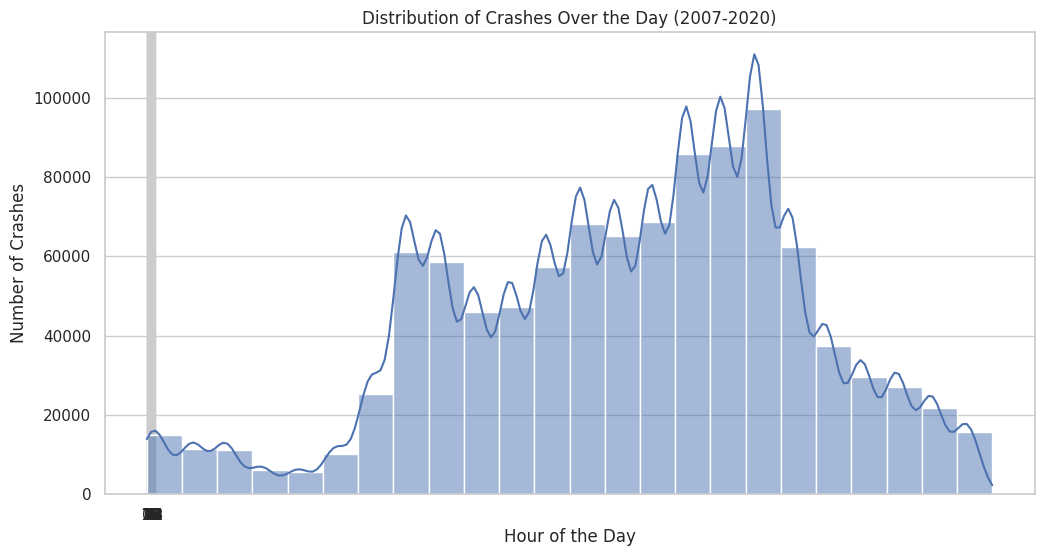

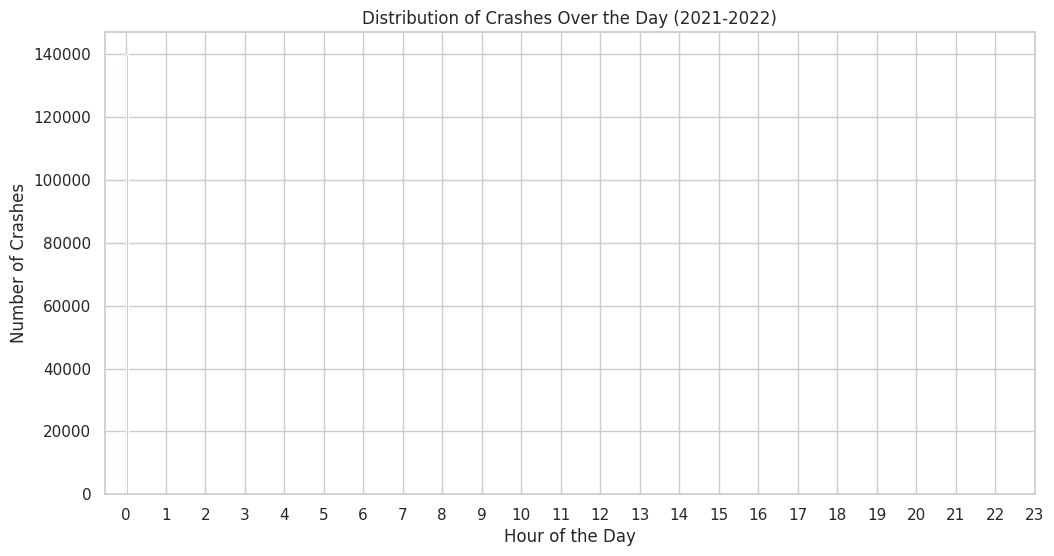

In [ ]:
# Distribution of crashes over the day for 2007-2020
plt.figure(figsize=(12, 6))
sns.histplot(df_2007_2020_clean['TIME'], bins=24, kde=True)
plt.title('Distribution of Crashes Over the Day (2007-2020)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.show()

# Distribution of crashes over the day for 2021-2022
plt.figure(figsize=(12, 6))
sns.histplot(df_2021_2022_clean['TIME'], bins=24, kde=True)
plt.title('Distribution of Crashes Over the Day (2021-2022)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.show()


### 2. Weather Analysis
Now, let’s see how weather conditions affect crash occurrences.

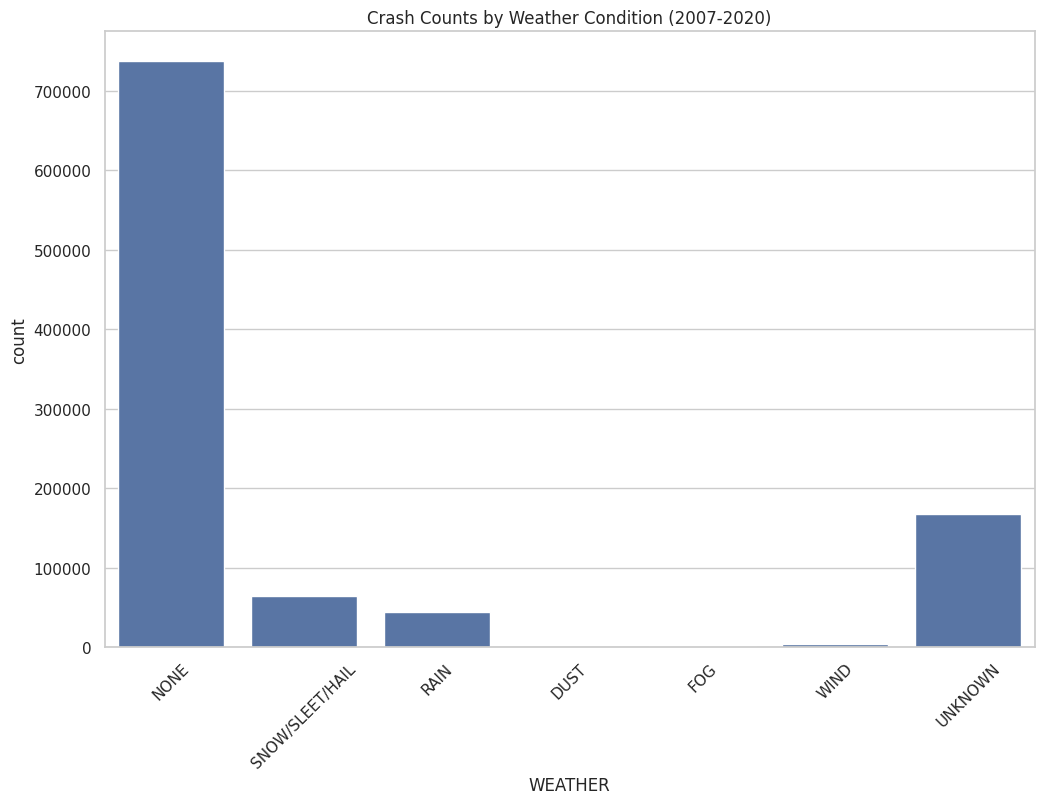

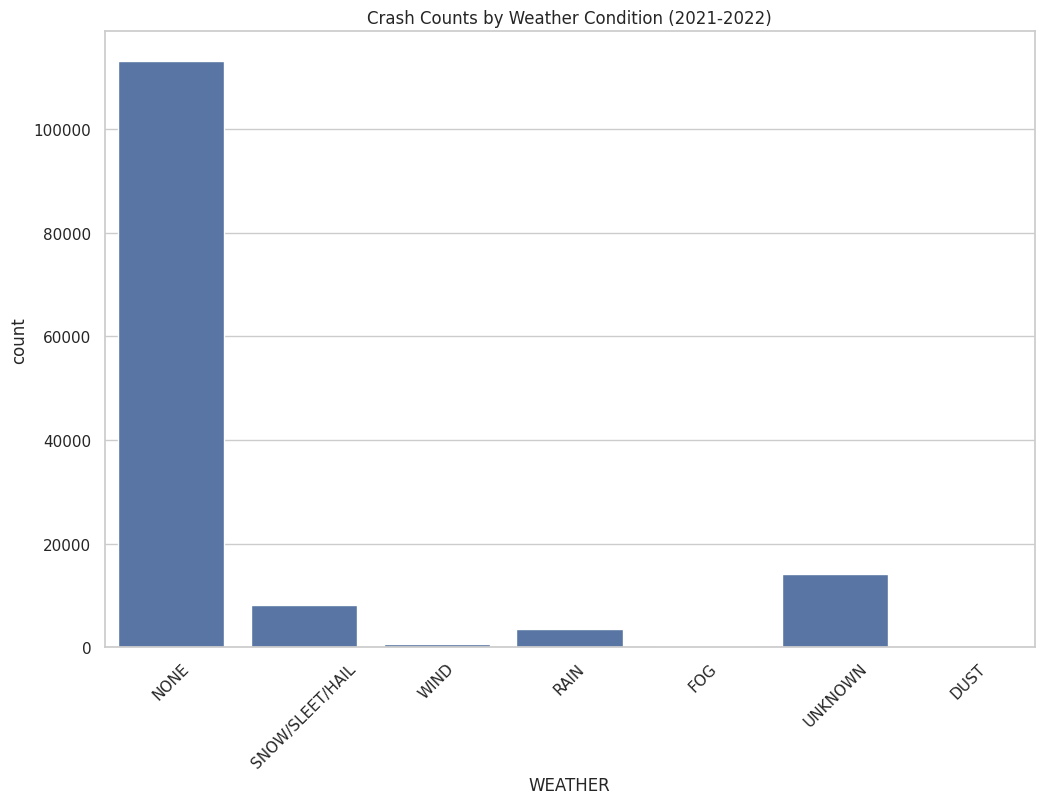

In [ ]:

# Weather condition and the number of crashes for 2007-2020
plt.figure(figsize=(12, 8))
sns.countplot(x='WEATHER', data=df_2007_2020_clean)
plt.title('Crash Counts by Weather Condition (2007-2020)')
plt.xticks(rotation=45)
plt.show()

# Weather condition and the number of crashes for 2021-2022
plt.figure(figsize=(12, 8))
sns.countplot(x='WEATHER', data=df_2021_2022_clean)
plt.title('Crash Counts by Weather Condition (2021-2022)')
plt.xticks(rotation=45)
plt.show()


### 3. Lighting and Road Condition Analysis
Let's examine how lighting and road conditions correlate with crashes.

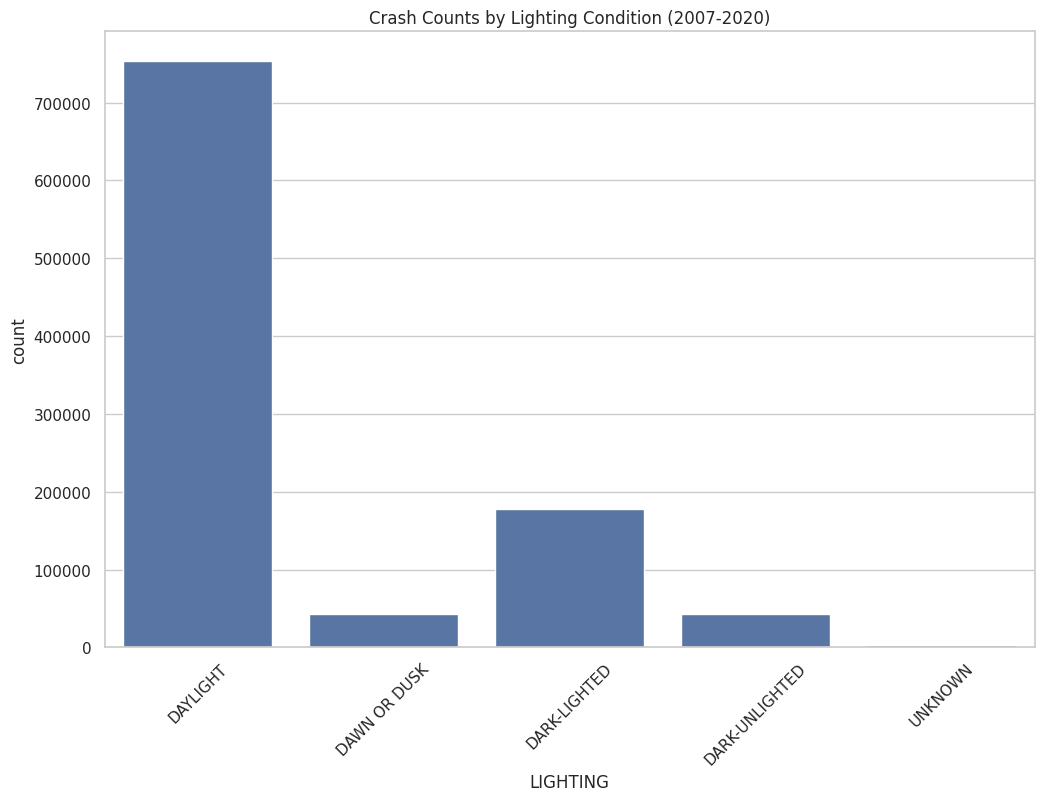

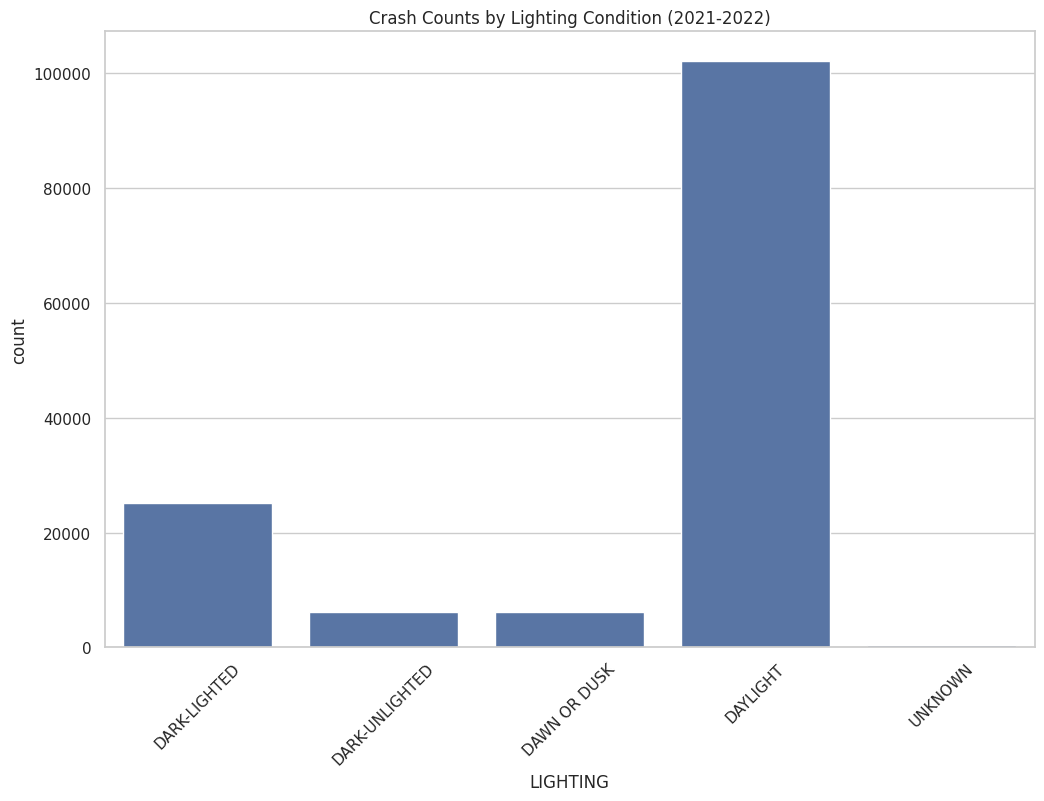

In [ ]:
# Lighting condition and crash counts for 2007-2020
plt.figure(figsize=(12, 8))
sns.countplot(x='LIGHTING', data=df_2007_2020_clean)
plt.title('Crash Counts by Lighting Condition (2007-2020)')
plt.xticks(rotation=45)
plt.show()

# Lighting condition and crash counts for 2021-2022
plt.figure(figsize=(12, 8))
sns.countplot(x='LIGHTING', data=df_2021_2022_clean)
plt.title('Crash Counts by Lighting Condition (2021-2022)')
plt.xticks(rotation=45)
plt.show()



### 4.Road condtion

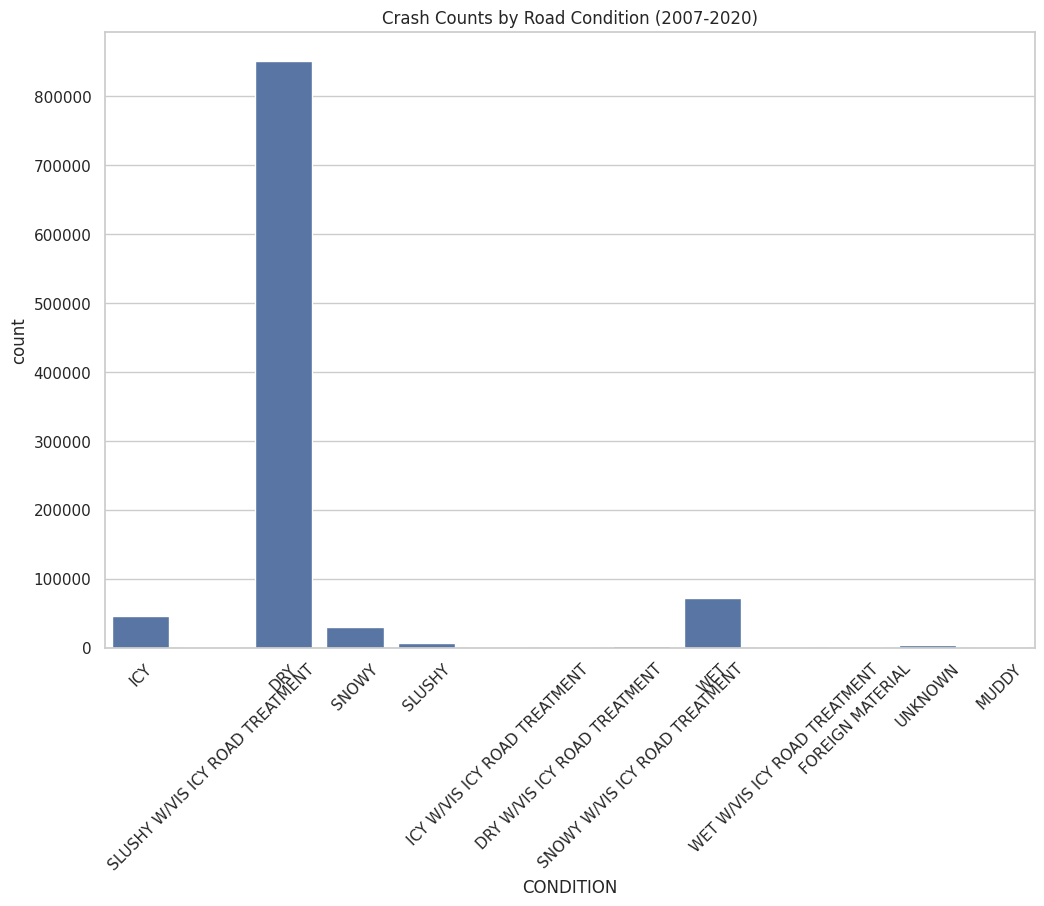

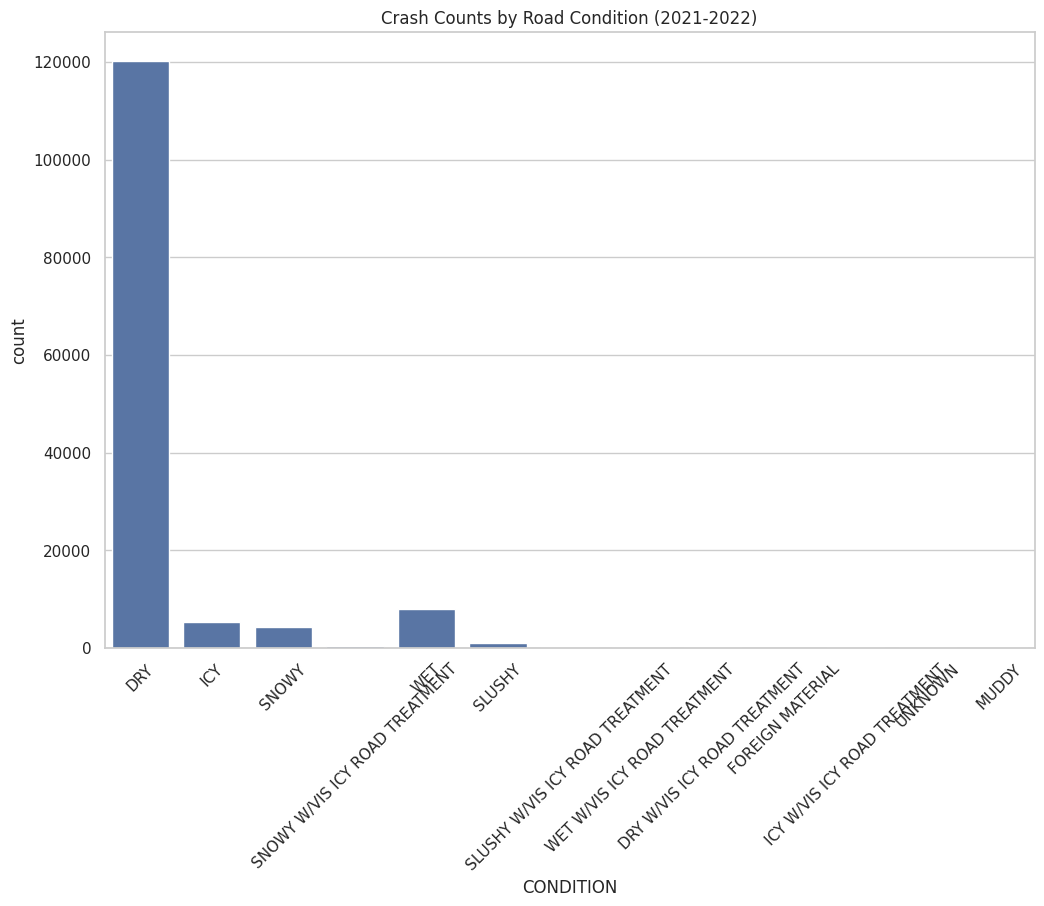

In [ ]:
# Road condition and crash counts for 2007-2020
plt.figure(figsize=(12, 8))
sns.countplot(x='CONDITION', data=df_2007_2020_clean)
plt.title('Crash Counts by Road Condition (2007-2020)')
plt.xticks(rotation=45)
plt.show()

# Road condition and crash counts for 2021-2022
plt.figure(figsize=(12, 8))
sns.countplot(x='CONDITION', data=df_2021_2022_clean)
plt.title('Crash Counts by Road Condition (2021-2022)')
plt.xticks(rotation=45)
plt.show()


### 5. System and Route Analysis
Analyzing the system (highway classification) and routes may provide insights into high-risk areas or systems.

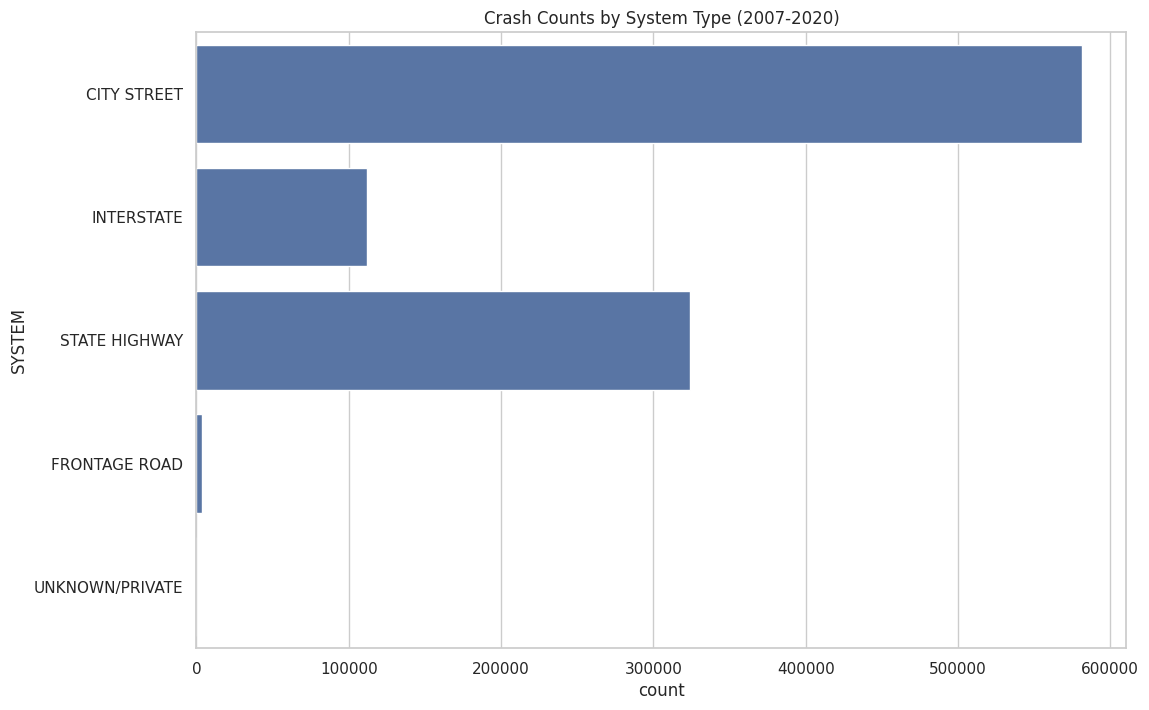

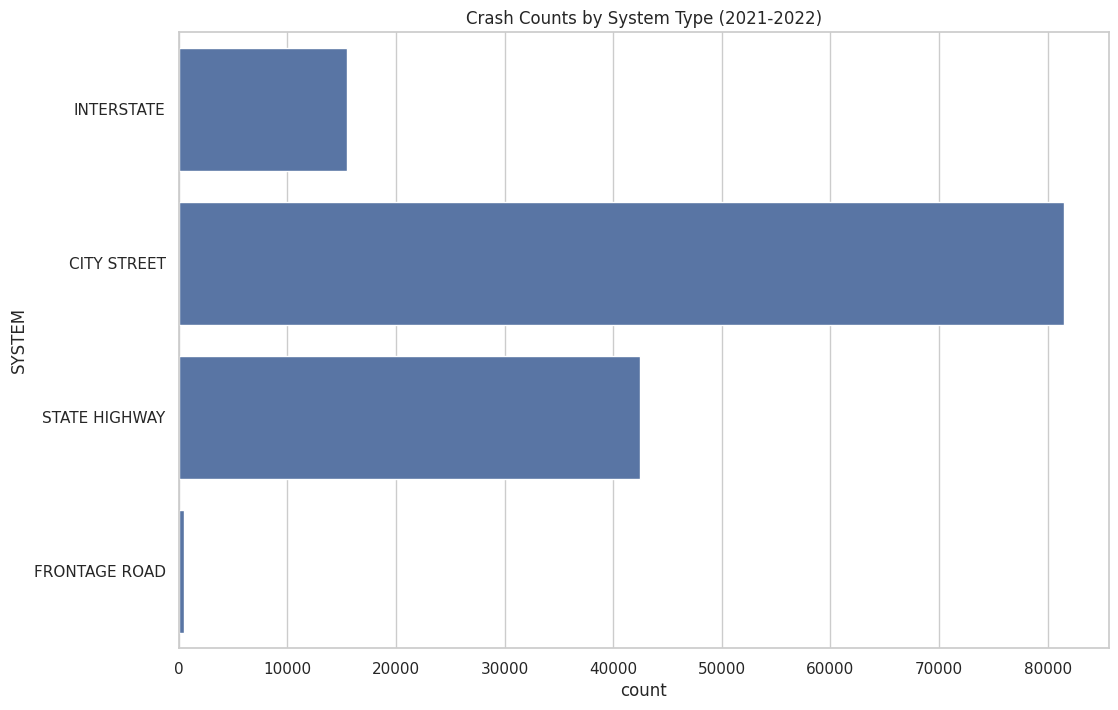

In [ ]:
# System type and crash counts for 2007-2020
plt.figure(figsize=(12, 8))
sns.countplot(y='SYSTEM', data=df_2007_2020_clean)
plt.title('Crash Counts by System Type (2007-2020)')
plt.show()

# System type and crash counts for 2021-2022
plt.figure(figsize=(12, 8))
sns.countplot(y='SYSTEM', data=df_2021_2022_clean)
plt.title('Crash Counts by System Type (2021-2022)')
plt.show()


## Please Refer to Part 2: Code